<a href="https://colab.research.google.com/github/gbardaklis/Mini-Project-1/blob/gia-testing/MP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Task 1: Dataset Preparation & Analysis

In [2]:
with open("/content/goemotions.json") as f:
    data = json.load(f)

In [3]:
# importing the json file into a dataframe 
df = pd.DataFrame(data, columns = ['Post', 'Emotion', 'Sentiment'])
df

,Post,Emotion,Sentiment
0,That game hurt.,sadness,negative
1,"You do right, if you don't care then fuck 'em!",neutral,neutral
2,Man I love reddit.,love,positive
3,"[NAME] was nowhere near them, he was by the Fa...",neutral,neutral
4,Right? Considering it’s such an important docu...,gratitude,positive
...,...,...,...
171815,"Well, I'm glad you're out of all that now. How...",joy,positive
171816,Everyone likes [NAME].,love,positive
171817,Well when you’ve imported about a gazillion of...,caring,positive
171818,That looks amazing,admiration,positive


In [4]:
postsDict = df['Post'].values.tolist()

In [5]:
# Returns the count of all 28 emotions, and stores it in countEmotions
countEmotions = df['Emotion'].value_counts()
# Turning the counts into a dictionary of pairs 
emotionsDict = countEmotions.to_dict()
# emotionsDict

In [6]:
# Returns the count of all 4 sentiments, and stores it in countSentiments
countSentiments = df['Sentiment'].value_counts()
# Turning the sentiment count into a dictionary of pairs 
sentimentsDict = countSentiments.to_dict()
# sentimentsDict

In [10]:
# # Stores emotions into a list
# emotion = df['Emotion'].tolist()
# # Removes emotions duplicate from the list
# emotion = list(dict.fromkeys(emotion))

In [11]:
# # Stores sentiments into a list
# sentiment = df['Sentiment'].tolist()
# # Removes sentiments duplicate from the list
# sentiment = list(dict.fromkeys(sentiment))

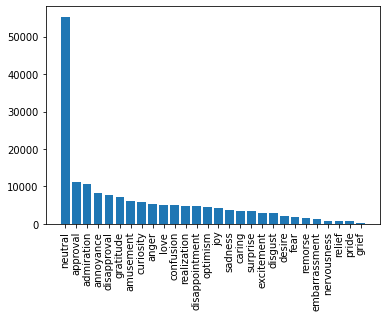

<Figure size 432x288 with 0 Axes>

In [7]:
# Printing histogram for emotions
plt.bar(emotionsDict.keys(), emotionsDict.values())
# 90 degree roration on x-axis labels
plt.xticks(rotation = 90)
plt.show()
plt.savefig('emotion-plot.pdf')

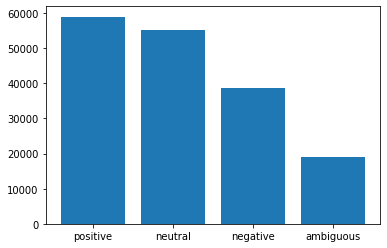

<Figure size 432x288 with 0 Axes>

In [8]:
# Printing sentiments in histogram
plt.bar(sentimentsDict.keys(), sentimentsDict.values())
plt.show()
plt.savefig('sentiment-plot.png')

# Task 2: Words as Features

In [9]:
# 2.1 --display the number of tokens (the size of the vocabulary) in the dataset

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(postsDict)
print(f'The size of the vocabulary is {vectorizer.get_feature_names_out().shape[0]} words.')

The size of the vocabulary is 30449 words.


In [10]:
# 2.2 --split the dataset into 80% for training and 20% for testing
post_train, post_test,emotion_train, emotion_test, sentiment_train, sentiment_test = train_test_split(df['Post'],df['Emotion'], df['Sentiment'], test_size=0.2, random_state = 1)

In [16]:
# 2.3 --train and test for both the emotion and sentiment classification using word frequency as features

In [11]:
#fit and transform post training data
vect = CountVectorizer()
post_train_dtm = vect.fit_transform(post_train)
post_train_dtm

<137456x30021 sparse matrix of type '<class 'numpy.int64'>'
	with 1549287 stored elements in Compressed Sparse Row format>

In [12]:
#fit and transform emotion training data
vect = CountVectorizer()
emotion_train_dtm = vect.fit_transform(emotion_train)
emotion_train_dtm

<137456x28 sparse matrix of type '<class 'numpy.int64'>'
	with 137456 stored elements in Compressed Sparse Row format>

In [13]:
#fit and transform sentiment training data
sentiment_train_dtm = vect.fit_transform(sentiment_train)
sentiment_train_dtm

<137456x4 sparse matrix of type '<class 'numpy.int64'>'
	with 137456 stored elements in Compressed Sparse Row format>

In [14]:
#fit and transform post testing data
vect = CountVectorizer()
post_test_dtm = vect.fit_transform(post_test)
post_test_dtm

<34364x20868 sparse matrix of type '<class 'numpy.int64'>'
	with 386922 stored elements in Compressed Sparse Row format>

In [15]:
#fit and transform emotion testing data
vect = CountVectorizer()
emotion_test_dtm = vect.fit_transform(emotion_test)
emotion_test_dtm

<34364x28 sparse matrix of type '<class 'numpy.int64'>'
	with 34364 stored elements in Compressed Sparse Row format>

In [16]:
#fit and transform sentiment testing data
sentiment_test_dtm = vect.fit_transform(sentiment_test)
sentiment_test_dtm

<34364x4 sparse matrix of type '<class 'numpy.int64'>'
	with 34364 stored elements in Compressed Sparse Row format>

In [17]:
# 2.3.1 --Base-MNB with the default parameters
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
%time mnb.fit(post_train_dtm, emotion_train )
%time mnb.fit(post_train_dtm, sentiment_train)

CPU times: user 1.32 s, sys: 21.2 ms, total: 1.35 s
Wall time: 1.35 s
CPU times: user 1.13 s, sys: 5.6 ms, total: 1.14 s
Wall time: 1.13 s


MultinomialNB()

In [19]:
# 2.3.2 --Base-DT with the default parameters
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
dt = DecisionTreeClassifier(random_state = 0)
%time dt.fit(post_train_dtm, emotion_train)
%time dt.fit(post_train_dtm, sentiment_train)

CPU times: user 2min 6s, sys: 210 ms, total: 2min 6s
Wall time: 2min 14s
CPU times: user 1min 46s, sys: 121 ms, total: 1min 47s
Wall time: 1min 47s


DecisionTreeClassifier(random_state=0)

In [19]:
#2.3.3 --Base-MLP with the default parameters
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(early_stopping=True)
%time mlp.fit(post_train_dtm, emotion_train)
%time mlp.fit(post_train_dtm, sentiment_train)

CPU times: user 6min 44s, sys: 5min 1s, total: 11min 46s
Wall time: 6min 16s
CPU times: user 7min 15s, sys: 5min 27s, total: 12min 43s
Wall time: 6min 33s


MLPClassifier(early_stopping=True)

In [34]:
#2.3.4 --Top-MNB using GridSearchCV
#not tested
from sklearn.model_selection import GridSearchCV
param = {'alpha' : [0.5, 0, 1.0, 1.5]}
mnb_gscv = GridSearchCV(MultinomialNB(), param)
%time mnb_gscv.fit(post_train_dtm, emotion_train)
%time mnb_gscv.fit(post_train_dtm, sentiment_train)

CPU times: user 3.72 s, sys: 144 ms, total: 3.86 s
Wall time: 20.4 s
CPU times: user 3.04 s, sys: 79.3 ms, total: 3.12 s
Wall time: 14.2 s


GridSearchCV(estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.5, 0, 1.0, 1.5]})

In [20]:
#2.3.5 --Top-DT using GridSearchCV
from sklearn.model_selection import GridSearchCV
param = {'criterion' : ['gini', 'entropy'], 'max_depth' : [18,36], 'min_samples_split' : [3,6,9]}
dt_gscv = GridSearchCV(DecisionTreeClassifier(), param)
%time dt_gscv.fit(post_train_dtm, emotion_train)
%time dt_gscv.fit(post_train_dtm, sentiment_train)



CPU times: user 8min 10s, sys: 723 ms, total: 8min 11s
Wall time: 8min 17s
CPU times: user 6min 50s, sys: 822 ms, total: 6min 51s
Wall time: 7min 4s


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [18, 36],
                         'min_samples_split': [3, 6, 9]})

In [ ]:
#2.3.6 --Top-MLP using GridSearchCV
#not tested
from sklearn.model_selection import GridSearchCV
param = {'activation' : ['sigmoid', 'tanh', 'relu', 'identity'], 'hidden_layer_sizes' : [(10,10,10), (20, 40)], 'solver' : ['adam', 'sgd']}
mlp_gscv = GridSearchCV(MLPClassifier(early_stopping=True), param)
%time mlp_gscv.fit(post_train_dtm, emotion_train)
%time mlp_gscv.fit(post_train_dtm, sentiment_train)

In [ ]:
#2.4 --save info required  in a file called "performance"